##  WI23 Week 7


## <span style='background:yellow'>roadmap </span>:

1. **normalize all the variables**
2. **Self-Implementation of K-means: Use Kmean++ to get the initial centroids; rewright one-hot-encoding features.**
3. explore race 4 clusters into B and H distribution by looking at other feature variables; (modified: B, W, and H)
4. Clean up code (github)
5. Putting into the report: **possible research question (or a theme?): Implicit Bias Detection ?**



6. (optional) have been playing with arrest dataset so far, could apply the same thing above to the crime dataset as well to check if there's any inconsistency (crime dataset is a loooot bigger than arrest, not sure if dsmlp can support big data)


### <span style='background:yellow'> Step 1. Normalize all feature variable (still using the sklearn package): </span>

**<font color='blue'>After Normalization</font>: The race Distribution (the green bar) and overall (the blue bar) for B, H, W, O**

within 5 clusters on left, and 4 clusters on right
<table><tr>
<td> <img src='image/sklearn_5_clusters.png' width='450'> </td>
<td> <img src='image/sklearn_4_clusters.png' width='450'> </td>
</tr></table>

There seems to be a lot more variation in all groups (than before normalizing).

<font color='red'> **What's Different: Loss is a lot lower after normalize; elbow point for num_cluster change from 4 to 5; Much more variances in race distribution**</font>

<font color='blue'> **Before Normalization** </font> Recall the K-means 4 clusters from week 5 (the graph below on right), so I assume there's actually a lot more spurious relationship between race with other data feature than I initially expected last week.

<table><tr>
<td> <img src='image/week5_overall_distribution.png' width='450'> </td>
<td> <img src='image/week5_4_clusters.png' width='450'> </td>
</tr></table>


**Visualization of Cluster with Dimension Reduction (after normalizing)**
<img src='image/dim_red_sklearn.png' width='450'>

### <span style='background:yellow'>Step 2. Customized K-Means Implementation to Reweight One-hot-encoding Features :</span>

**Reweighting the feature variable so that each set of one-hot-encoding only have 1 weight.**
- Have managed to manually add this function into the self-implementation of K-means
- Use K-means++ to iteratively initialize the centroids. Randomly choose a data as initial centroids will break my code.

The Race Distribution within clusters compared to the overall distribution (4 clusters)
<img src='image/custom_4_clusters.png' width='450'>

<font color='red'> **What's Different: Looks more stable comapred to the first graph in step 1 (when I only had normalization)**</font>


**Visualization of Cluster with Dimension Reduction (after normalizing)**
<img src='image/dim_red_custom.png' width='450'>

From the clusters graph (even though it might be inaccract bc it reduce the data to 2D), it also looks like reweighting is doing something here that help better clustering the data. So overall, with normalization and reweighting, model's performing better with more complexity (or more feature engineering), and the race distribution have shown some inconsistency with the overall race distribution, which might indicates some spurious relationship.

## <span style='background:yellow'> Archive </span>

**an interesting note**: As I was normalizing the columns, I forgot to remove the duplicate index column in the df_feature, and it turned out that distributions within clusters stay about the same as the overall distribution, loss is a loooot higher than before though. Maybe its's the duplicated feature variable that stablize the cluster.
<table><tr>
<td> <img src='image/normalize_3_clusters.png' width='450'> </td>
<td> <img src='image/normalize_4_clusters.png' width='450'> </td>
</tr></table>

And the dim reduction graph looks a lot different after I fixed this issue:\
It looks like gummy worms before, now its just separate groups of data (which I think the second one makes more sense):
<table><tr>
<td> <img src='image/gummy worms.png' width='450'> </td>
<td> <img src='image/dim_red_custom.png' width='450'> </td>
</tr></table>


## <span style='background:yellow'> Possible Research Name: Implicit Bias Detection </span>

## <span style='background:orange'> Everything Below is Coding Part </span>

### Feature Eng (arrest)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

arrest = pd.read_csv('arrest-data-from-2010-to-present.csv')
crime = pd.read_csv('crime-data-from-2010-to-present.csv')

In [2]:
#feature engineering for arrest dataset

arrest = arrest.dropna(axis=0)

#date (month, date), and time (hour,  minute)
import datetime
day = arrest['Arrest Date'].apply(lambda x: int(str(x)[8:10]))
month = arrest['Arrest Date'].apply(lambda x: int(str(x)[5:7]))
hour = arrest['Time'].apply(lambda x: int(str(int(x))[:-2]) if str(int(x))[:-2] != '' else 0)
minute = arrest['Time'].apply(lambda x: int(str(int(x))[-2:]) if str(int(x))[:-2] != '' else 0)

#location (Geographic Areas, latitude, longitude)
import ast
area_ID = arrest['Area ID']
latitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['latitude']))
longitude = arrest['Location'].apply(lambda x: float(ast.literal_eval(x)['longitude']))

#charge and arrest type
dummies_arrest = pd.get_dummies(arrest['Arrest Type Code'])
dummies_charge = pd.get_dummies(arrest['Charge Group Code'])

#Age
age = arrest['Age']
#sex
dummies_sex = pd.get_dummies(arrest['Sex Code'])
#race
dummies_race = pd.get_dummies(arrest['Descent Code'])


## <span style='background:orange'> Normalize Features </span>

In [3]:
def normalize(series):
    #already imported np and pd
    array = np.array(series)
    array_norm = (array-np.min(array))/(np.max(array)-np.min(array))
    return pd.Series(array_norm)

In [4]:
need_normalize = [day, month, hour, minute, area_ID, latitude, longitude, age]
for i in range(len(need_normalize)):
    need_normalize[i] = normalize(need_normalize[i])


In [5]:

df_feature = pd.concat({'day':need_normalize[0], 'month':need_normalize[1], 
                        'hour':need_normalize[2], 'minute': need_normalize[3], 
                        'area':need_normalize[4], 
                        'lat':need_normalize[5], 'lon':need_normalize[6], 
                        'Age': need_normalize[7], 
                        },axis=1)


In [6]:
dummies_arrest = dummies_arrest.reset_index()
dummies_charge = dummies_charge.reset_index()
dummies_sex = dummies_sex.reset_index()

In [7]:
df_feature = df_feature.merge(dummies_arrest, left_index=True, right_index=True)
df_feature = df_feature.merge(dummies_charge, left_index=True, right_index=True)
df_feature = df_feature.merge(dummies_sex, left_index=True, right_index=True)

In [8]:
df_feature = df_feature.drop(columns=['index_x', 'index_y', 'index'])

In [9]:
df_feature

,day,month,hour,minute,area,lat,lon,Age,D,F_x,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,F_y,M_y
0,0.7,0.454545,0.166667,0.000000,0.70,0.776950,0.546278,0.329787,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.7,0.454545,0.083333,0.677966,0.85,0.381114,0.810787,0.212766,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.7,0.454545,0.666667,0.254237,0.55,0.399560,0.735059,0.148936,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.7,0.454545,0.000000,0.000000,0.65,0.538501,0.519310,0.372340,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.7,0.454545,0.291667,0.423729,0.35,0.573193,0.432794,0.276596,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,0.0,0.000000,0.916667,0.000000,0.60,0.487561,0.867098,0.436170,0,0,...,0,0,1,0,0,0,0,0,0,1
208256,0.0,0.000000,0.708333,0.423729,0.75,0.897275,0.609061,0.170213,0,1,...,0,0,0,0,0,0,0,0,0,1
208257,0.0,0.000000,0.875000,0.847458,0.55,0.454730,0.687810,0.159574,0,1,...,0,0,0,0,0,0,0,0,0,1
208258,0.0,0.000000,0.916667,0.254237,0.50,0.684211,0.987918,0.127660,0,0,...,0,0,0,0,1,0,0,0,0,1


In [10]:
df_feature.columns

Index([   'day',  'month',   'hour', 'minute',   'area',    'lat',    'lon',
          'Age',      'D',    'F_x',      'I',    'M_x',      'O',      1.0,
            2.0,      3.0,      4.0,      5.0,      6.0,      7.0,      8.0,
            9.0,     10.0,     11.0,     12.0,     13.0,     14.0,     15.0,
           16.0,     17.0,     18.0,     19.0,     20.0,     21.0,     22.0,
           23.0,     24.0,     25.0,     26.0,     27.0,    'F_y',    'M_y'],
      dtype='object')

In [11]:
## Visualizing the data with reduced dim (TSNE runs forever...........)

# import seaborn as sns
# from sklearn.manifold import TSNE, MDS

# X = df_feature.values.tolist()
# y = pd.factorize(arrest['Descent Code'])[0]
# y = y.tolist()

# rnd_indices = np.random.choice(len(X), size=10000)
# rnd_X = [X[i] for i in rnd_indices]
# rnd_y = [y[i] for i in rnd_indices]

# dims = TSNE(random_state=42).fit_transform(rnd_X)
# dim1, dim2 = dims[:, 0], dims[:, 1]
# sns.scatterplot(x=dim1, y=dim2, hue=rnd_y, palette='tab10', legend=False)
# plt.title('Overall Data Distribution after t-SNE');

### Sklearn K-means Model

In [12]:
#### K-means model from sk-learn
from sklearn.cluster import KMeans
import numpy as np

def get_grouping_assignment(df_feature, num_cluster):
        
    X = df_feature.values.tolist()
    y = pd.factorize(arrest['Descent Code'])[0]
    y = y.tolist()
    
    kmeans = KMeans(n_clusters=num_cluster, random_state=0).fit(X)
    
    prediction = []
    for x in X:
        y_pred = kmeans.predict(np.array([x]))
        prediction.append(y_pred)
        
    loss = kmeans.inertia_
    
    return y, [i[0] for i in prediction], loss


In [13]:
def Run_Race(df_feature, cluster_range):
    
    loss_lis = []
    
    significant_race = ['B', 'H', 'W', 'O']
    
    race_code_dic = {0:'O', 1:'H', 2:'B', 3:'W', 4:'A', 5:'G', 6:'F', 7:'J', 8:'I', 9:'C', 10:'K', 11:'P', 12:'X', 13:'U', 14:'Z', 15:'S', 16:'L'}
    
    def total_variation_distance(first_distrib, second_distrib):
        '''Computes the total variation distance between two distributions.'''
        return np.sum(np.abs(first_distrib - second_distrib)) / 2
    
    prediction_dict = {}
    
    for num_cluster in cluster_range:
        
        tvd_lis = []
        
        group_assignment = get_grouping_assignment(df_feature, num_cluster)
        y = group_assignment[0]
        prediction = group_assignment[1]
        loss = group_assignment[2]
        
        loss_lis.append(loss)
        
        #TODO: does mapping actually work for the predictiuon here?
        df_results = pd.concat({'race_label':pd.Series(y).map(race_code_dic), 
                                'grouping':pd.Series(prediction)}, axis=1) 
        
        prediction_dict[num_cluster] = df_results
        
        #only getting the distribution of 'B', 'H', 'W', 'O'
        y_dist_series = df_results[df_results.race_label.isin(significant_race)].race_label.value_counts(normalize=True)
        
#         print("======================= Model with", num_cluster,  "of cluster =======================")
        
        #after the clustering process is done, look into only one cluster at a time and calculate the tvd for race
        for group in df_results.grouping.unique(): 
            
            pred_dist_series_group = df_results[(df_results.grouping == group) & (df_results.race_label.isin(significant_race))].race_label.value_counts(normalize=True)
            df_concat = pd.concat([y_dist_series, pred_dist_series_group], axis=1) #this step is to map the index, should all have race code as index, and percent as value
            df_concat.columns = ['c1', 'c2']
            
            tvd = total_variation_distance(np.array(df_concat['c1']), np.array(df_concat['c2'])) 
            tvd_lis.append(tvd)
            
#         TODO: simulated TVDs and get the p-value if necessary (if tvd appears to be large)
#             or not? if tvd is large than 0.01 or 0.05, then its clear p-value is gonna be close to 0 (or < 0.01)
            
            simulated_tvds = np.array([])
            trials = 5000
            num_sample = len(prediction)
            for trial in np.arange(trials):
                simulated_empirical = np.random.multinomial(num_sample, np.array(y_dist_series)) / num_sample
                current_tvd = total_variation_distance(np.array(df_concat['c1']), simulated_empirical)
                simulated_tvds = np.append(simulated_tvds, current_tvd)
                
            #proportion of times in our simulation that we saw a TVD greater than or equal to our observed TVD.
            p_value = np.count_nonzero(simulated_tvds >= tvd) / trials
            
        # Visualize with a histogram
#         counts, bins = np.histogram(simulated_tvds)
#         plt.stairs(counts, bins)
#         plt.hist(bins[:-1], bins, weights=counts)
#         plt.axvline(x=tvd, color='black', linewidth=4, label='observed average tvd')
#         plt.legend()
#         plt.show()
        
        print("average tvd between", str(num_cluster), "cluster and overall distribution:", sum(tvd_lis)/len(tvd_lis), 'P-value:', p_value)
        
        
        
    return prediction_dict, loss_lis
            
        

In [14]:
prediction_dict, loss_lis = Run_Race(df_feature, range(3, 7))

average tvd between 3 cluster and overall distribution: 0.09070718846259655 P-value: 0.0
average tvd between 4 cluster and overall distribution: 0.10826596396660429 P-value: 0.0
average tvd between 5 cluster and overall distribution: 0.11908341414992556 P-value: 0.0
average tvd between 6 cluster and overall distribution: 0.1175966047738274 P-value: 0.0


In [15]:
def plot_elbow(k_range, loss_lis):
    from matplotlib import pyplot as plt
    plt.plot(k_range, loss_lis)
    plt.title('Optimal num of Cluster')
    plt.xlabel('Num of clusters k')
    plt.ylabel('Sum of squared distances')
    plt.show

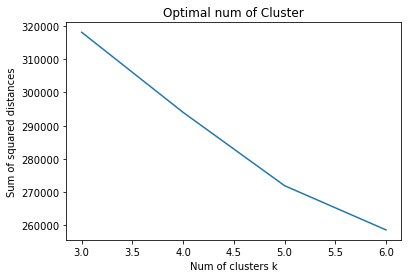

In [16]:
plot_elbow(np.arange(3, 7), loss_lis)

4 seem like a good number for clusters from the above graph on loss scores.\
after removing duplicate index columns in df_feature, the graph indecates 5 cluster is the elbow point

### Plot the Race Distribution Overall & Within Clusters (for k=4 and k=3)

#### Race Ditribution Overall:
only plot B H W O later to better visualize these four

<BarContainer object of 17 artists>

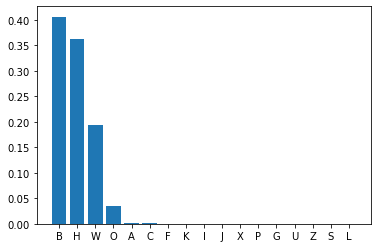

In [17]:
five_clusters_df = prediction_dict[5]
prop_all = five_clusters_df.race_label.value_counts(normalize=True)
plt.bar(prop_all.index, prop_all.values)

#### Race Distribution Within 5 Clusters

In [18]:
five_clusters_df = prediction_dict[5]
five_clusters_df = five_clusters_df[five_clusters_df['race_label'].isin(['B', 'H', 'W', 'O'])]

Text(0.5, 1.0, 'Race Distribution: Overall & Within_Clusters, k=5')

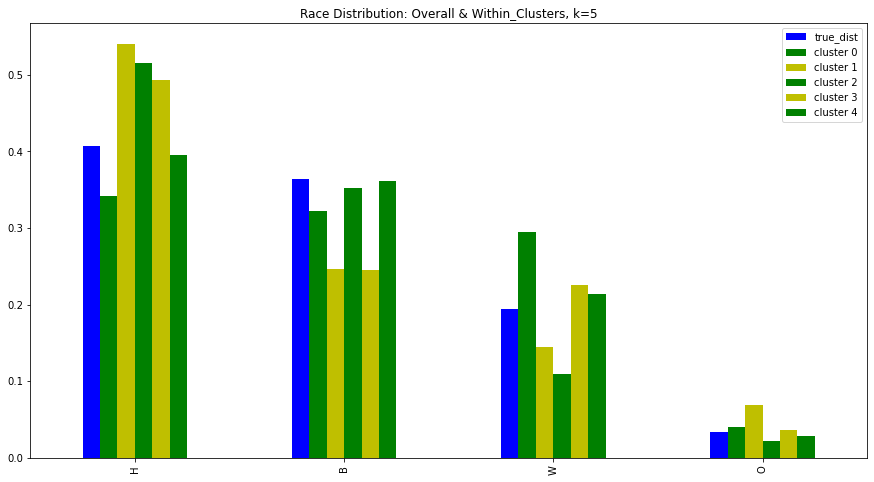

In [28]:

plotdata = pd.DataFrame({
    
    "true_dist": five_clusters_df.race_label.value_counts(normalize=True).values,

    "cluster 0":five_clusters_df[five_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).values,

    "cluster 1":five_clusters_df[five_clusters_df['grouping'] == 1].race_label.value_counts(normalize=True).values,

    "cluster 2":five_clusters_df[five_clusters_df['grouping'] == 2].race_label.value_counts(normalize=True).values,
    
    "cluster 3":five_clusters_df[five_clusters_df['grouping'] == 3].race_label.value_counts(normalize=True).values,
    
    "cluster 4":five_clusters_df[five_clusters_df['grouping'] == 4].race_label.value_counts(normalize=True).values},
    
    index = list(five_clusters_df[five_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).index))

my_colors = ['b', 'g', 'y', 'g', 'y', 'g']

plotdata.plot(kind="bar",figsize=(15, 8), color=my_colors)
plt.title('Race Distribution: Overall & Within_Clusters, k=5')

#### Race Distribution Within 4 Clusters

In [29]:
four_clusters_df = prediction_dict[4]
four_clusters_df = four_clusters_df[four_clusters_df['race_label'].isin(['B', 'H', 'W', 'O'])]

Text(0.5, 1.0, 'Race Distribution: Overall & Within_Clusters, k=4')

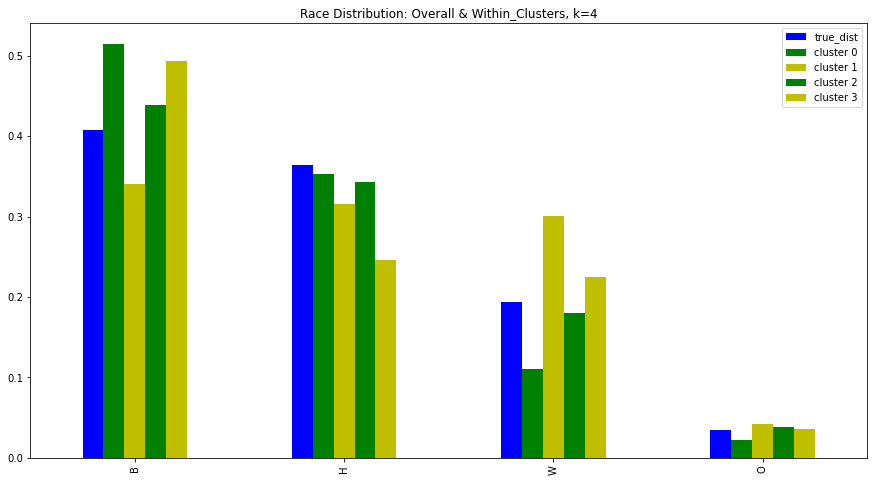

In [30]:

plotdata = pd.DataFrame({
    
    "true_dist": four_clusters_df.race_label.value_counts(normalize=True).values,

    "cluster 0":four_clusters_df[four_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).values,

    "cluster 1":four_clusters_df[four_clusters_df['grouping'] == 1].race_label.value_counts(normalize=True).values,

    "cluster 2":four_clusters_df[four_clusters_df['grouping'] == 2].race_label.value_counts(normalize=True).values,
    
    "cluster 3":four_clusters_df[four_clusters_df['grouping'] == 3].race_label.value_counts(normalize=True).values},
    
    index = list(four_clusters_df[four_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).index))

my_colors = ['b', 'g', 'y', 'g', 'y']

plotdata.plot(kind="bar",figsize=(15, 8), color=my_colors)
plt.title('Race Distribution: Overall & Within_Clusters, k=4')

#### Race Distribution Within 3 Clusters

In [31]:
three_clusters_df = prediction_dict[3]
three_clusters_df = three_clusters_df[three_clusters_df['race_label'].isin(['B', 'H', 'W', 'O'])]

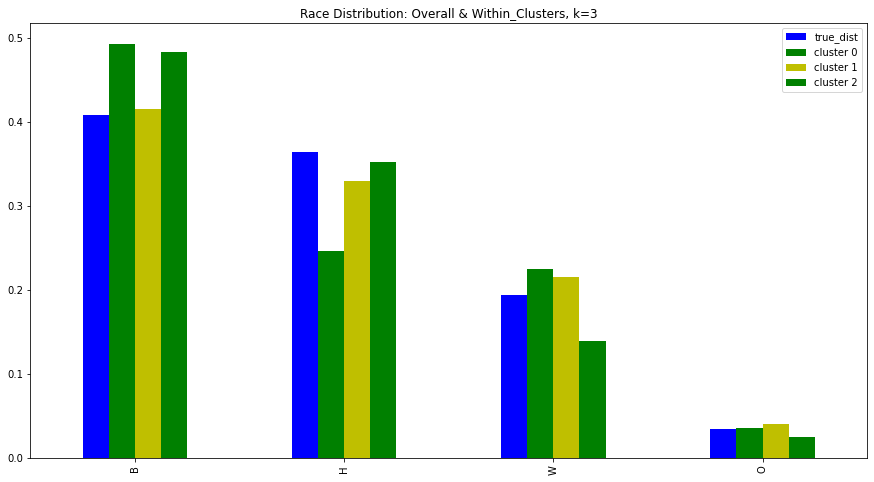

In [32]:

plotdata = pd.DataFrame({
    
    "true_dist": three_clusters_df.race_label.value_counts(normalize=True).values,

    "cluster 0":three_clusters_df[three_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).values,

    "cluster 1":three_clusters_df[three_clusters_df['grouping'] == 1].race_label.value_counts(normalize=True).values,

    "cluster 2":three_clusters_df[three_clusters_df['grouping'] == 2].race_label.value_counts(normalize=True).values},
       
    index = list(three_clusters_df[three_clusters_df['grouping'] == 0].race_label.value_counts(normalize=True).index))

my_colors = ['b', 'g', 'y', 'g', 'y']

plotdata.plot(kind="bar",figsize=(15, 8), color=my_colors)
plt.title('Race Distribution: Overall & Within_Clusters, k=3');

### Discussion from Step 1 (Normaliz the feature)

<font color='red'>**Before removing index col**: As we see from the two distribution graphs screenshots (for 4 and 3 clusters k-means model) on top, there is more variation in H (Hispanic/Latin/Mexican) and W (White) groups.\
    Loss is a lot higher after normalize; less variance in race distribution among clusters after normalize features.</font>
    
    
<font color='red'>**After removing index col**: from the 5 clusters graph, the distribution within clusters varies a lot in B H and W groups (even O), so we might need to look into all of them.</font>





Race Code:
A Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Vis the Cluster with Reduced Dim

In [34]:
import seaborn as sns
from sklearn.manifold import TSNE, MDS

X = df_feature.values.tolist()
y = pd.factorize(arrest['Descent Code'])[0]
y = y.tolist()

rnd_indices = np.random.choice(207503, size=50000) #the size for pred is slightly smaller than X
rnd_X = [X[i] for i in rnd_indices]
pred = four_clusters_df.grouping.tolist() 
rnd_pred = [pred[i] for i in rnd_indices]
y = three_clusters_df.race_label.tolist()
rnd_y = [y[i] for i in rnd_indices]

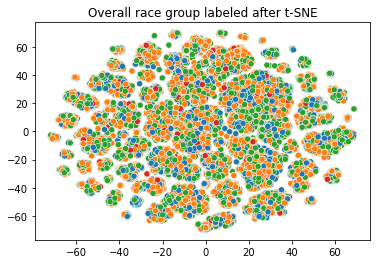

In [35]:
#color represent the race group
dims = TSNE(random_state=42).fit_transform(rnd_X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=rnd_y, palette='tab10', legend=False)
plt.title('Overall race group labeled after t-SNE');

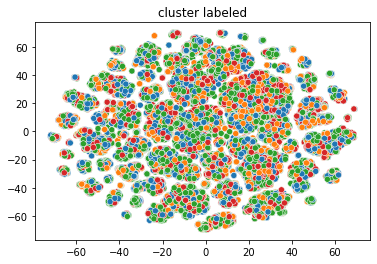

In [36]:
#cluster labeled
sns.scatterplot(x=dim1, y=dim2, hue=rnd_pred, palette='tab10', legend=False)
plt.title('cluster labeled');

#### From Above: sklearn K-means seems fine, gonna use the same dim reduction visualization method to test my self-implemented k-means later.

## <span style='background:orange'>  One-hot-encoding Less Weight w/ Customized K-Means<span>

In [37]:
df_feature

,day,month,hour,minute,area,lat,lon,Age,D,F_x,...,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,F_y,M_y
0,0.7,0.454545,0.166667,0.000000,0.70,0.776950,0.546278,0.329787,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.7,0.454545,0.083333,0.677966,0.85,0.381114,0.810787,0.212766,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.7,0.454545,0.666667,0.254237,0.55,0.399560,0.735059,0.148936,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.7,0.454545,0.000000,0.000000,0.65,0.538501,0.519310,0.372340,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.7,0.454545,0.291667,0.423729,0.35,0.573193,0.432794,0.276596,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208255,0.0,0.000000,0.916667,0.000000,0.60,0.487561,0.867098,0.436170,0,0,...,0,0,1,0,0,0,0,0,0,1
208256,0.0,0.000000,0.708333,0.423729,0.75,0.897275,0.609061,0.170213,0,1,...,0,0,0,0,0,0,0,0,0,1
208257,0.0,0.000000,0.875000,0.847458,0.55,0.454730,0.687810,0.159574,0,1,...,0,0,0,0,0,0,0,0,0,1
208258,0.0,0.000000,0.916667,0.254237,0.50,0.684211,0.987918,0.127660,0,0,...,0,0,0,0,1,0,0,0,0,1


**for quick reference**

df_feature = pd.concat({'day':need_normalize[0], 'month':need_normalize[1], 
                        'hour':need_normalize[2], 'minute': need_normalize[3], 
                        'area':need_normalize[4], 
                        'lat':need_normalize[5], 'lon':need_normalize[6], 
                        'Age': need_normalize[7], 
                        },axis=1)

dummies_arrest = dummies_arrest.reset_index()
dummies_charge = dummies_charge.reset_index()
dummies_sex = dummies_sex.reset_index()

df_feature = df_feature.merge(dummies_arrest, left_index=True, right_index=True)
df_feature = df_feature.merge(dummies_charge, left_index=True, right_index=True)
df_feature = df_feature.merge(dummies_sex, left_index=True, right_index=True)

In [38]:
df_feature.columns

Index([   'day',  'month',   'hour', 'minute',   'area',    'lat',    'lon',
          'Age',      'D',    'F_x',      'I',    'M_x',      'O',      1.0,
            2.0,      3.0,      4.0,      5.0,      6.0,      7.0,      8.0,
            9.0,     10.0,     11.0,     12.0,     13.0,     14.0,     15.0,
           16.0,     17.0,     18.0,     19.0,     20.0,     21.0,     22.0,
           23.0,     24.0,     25.0,     26.0,     27.0,    'F_y',    'M_y'],
      dtype='object')

In [39]:
# def Euclidean_distance(self, sub_matrix):
#     #distance = np.linalg.norm(sub_matrix, axis = 1) #ini 
        
#     distance = []
#     for sub in sub_matrix: #for each centroids
#         centroid_dis = 0
#         #first 8 col: numerical feature: index 0-7
#         for i in range(0, 8):
#             dis_part = (sub[i])**2
#             centroid_dis += dis_part
#         #next 5 col: arrest one-hot-encoding: index 8-12
#         for i in range(8, 13):
#             dis_part = (1/5 * (sub[i])**2) #assign alpha
#             centroid_dis += dis_part
#         #next 27 col: charge one-hot-encoding: index 13-39: 
#         for i in range(13, 13+27):
#             dis_part = (1/27 * (sub[i])**2) #assign alpha
#             centroid_dis += dis_part
#         #next 2 col: sex one-hot-encoding: 40-41
#         for i in range(40, 42):
#             dis_part = (1/2 * (sub[i])**2) #assign alpha
#             centroid_dis += dis_part
            
#         centroid_dis = np.sqrt(centroid_dis)
#         distance.append(centroid_dis)
        
#     return distance

### **checking if self-implementation works fine (comparing with sklearn models' results): and it turns out not working so fine :((, nvm, got it working**

<font color='red'>Looks like when I have 4 class, but the data are all classified into one group (class 1). The model then failed to recalculate the centroids for class 2 to 4 since I don't have any data classifed into those group, using np.mean doesn't work with 0 data, nor does any other function. Haven't figured a way to solve this problem.

The problem seems to be at the centroid initialization step, try using kmeans++ to iteratively find the best initial centroids, seems like it works, at least the code didn't break, and the dim reduction graph and race distribution bar charts all looks fine.</font>

In [40]:
from KMeans import KMeans_custom
import numpy as np
def get_grouping_assignment_custom(df_feature, num_cluster, order):
    
    #order 2 uses Euclidean distance for means; 1 uses Manhattan distance for medians

    X = df_feature.values
    y = pd.factorize(arrest['Descent Code'])[0]
    
    KMeans_custom_model = KMeans_custom(num_cluster, 200, order).fit(X)
    
    y_pred = KMeans_custom_model.predict(X)
    center = KMeans_custom_model.get_centers()
    loss = KMeans_custom_model.loss(X)
    
    return y, y_pred, center, loss


In [41]:
y, y_pred, center, loss = get_grouping_assignment_custom(df_feature, 4, 2)

0 th iteration:
Early Stopped at Iteration 37


In [42]:
race_code_dic = {0:'O', 1:'H', 2:'B', 3:'W', 4:'A', 5:'G', 6:'F', 7:'J', 8:'I', 9:'C', 10:'K', 11:'P', 12:'X', 13:'U', 14:'Z', 15:'S', 16:'L'}

y = pd.factorize(arrest['Descent Code'])[0]
y = y.tolist()

df_results_custom = pd.concat({'race_label':pd.Series(y).map(race_code_dic), 
                               'grouping':pd.Series(y_pred)}, axis=1) 
        


In [43]:
df_results_custom

,race_label,grouping
0,O,0
1,H,1
2,B,2
3,H,1
4,B,1
...,...,...
208255,H,3
208256,H,2
208257,B,2
208258,H,3


### Checking if Customized K-Means matches Sklearn model' results
#### Dim Reduction Visualization & Race Distribution

In [45]:
import seaborn as sns
from sklearn.manifold import TSNE, MDS

X = df_feature.values.tolist()
y = pd.factorize(arrest['Descent Code'])[0]
y = y.tolist()

rnd_indices = np.random.choice(207503, size=50000) #the size for pred is slightly smaller than X
rnd_X = [X[i] for i in rnd_indices]
pred = df_results_custom.grouping.tolist() 
rnd_pred = [pred[i] for i in rnd_indices]
y = df_results_custom.race_label.tolist()
rnd_y = [y[i] for i in rnd_indices]

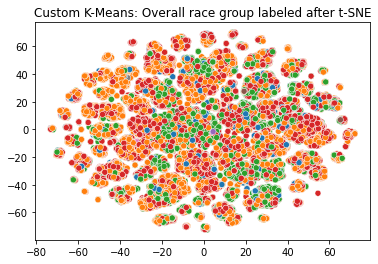

In [46]:
#color represent the race group
dims = TSNE(random_state=42).fit_transform(rnd_X)
dim1, dim2 = dims[:, 0], dims[:, 1]
sns.scatterplot(x=dim1, y=dim2, hue=rnd_y, palette='tab10', legend=False)
plt.title('Custom K-Means: Overall race group labeled after t-SNE');

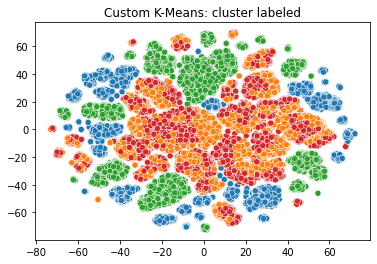

In [47]:
#cluster labeled
sns.scatterplot(x=dim1, y=dim2, hue=rnd_pred, palette='tab10', legend=False)
plt.title('Custom K-Means: cluster labeled');

the clusters looks liks they have some patterns there, so my implementation should be working fine.

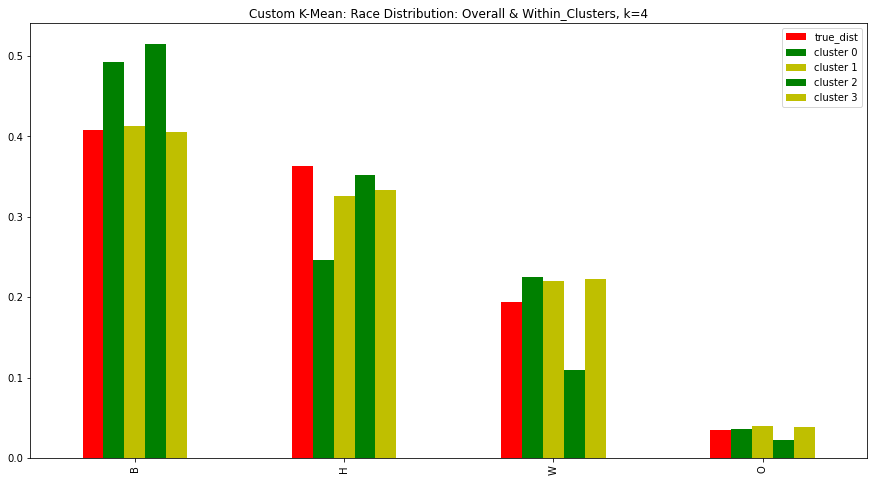

In [48]:
df_results_custom = df_results_custom[df_results_custom['race_label'].isin(['B', 'H', 'W', 'O'])]

plotdata = pd.DataFrame({
    
    "true_dist": df_results_custom.race_label.value_counts(normalize=True).values,

    "cluster 0":df_results_custom[df_results_custom['grouping'] == 0].race_label.value_counts(normalize=True).values,

    "cluster 1":df_results_custom[df_results_custom['grouping'] == 1].race_label.value_counts(normalize=True).values,
    
    "cluster 2":df_results_custom[df_results_custom['grouping'] == 2].race_label.value_counts(normalize=True).values,

    "cluster 3":df_results_custom[df_results_custom['grouping'] == 3].race_label.value_counts(normalize=True).values},
       
    index = list(df_results_custom[df_results_custom['grouping'] == 0].race_label.value_counts(normalize=True).index))

my_colors = ['r', 'g', 'y', 'g', 'y']

plotdata.plot(kind="bar",figsize=(15, 8), color=my_colors)
plt.title('Custom K-Mean: Race Distribution: Overall & Within_Clusters, k=4');

As expected, H and W have more variance.

### Some Discussion on Reweighting: 
- use customized distance function instead of np.linalg.norm(..., axis = 1):

- the centroids nor the cluster assignment doesn't change much after many iteration, the problem might be on the centroids initialization step (I was randomly selecting datapoint from 10th to 90th percentile, and iteratively updating the centroids) ; or also bc iter_num is only 100 when I tested it

solution: might need to look into existing package\
solution: use K-Means++ (Arthur & Vassilvitskii’07) (centroids are far away from each other, based on a weighted probability score)

- Later: could try Kernel K-Means for non-linearly separated cases (downside of this method: I was lost in class back when learning kernel....., need to review some course material for the basic stuff)

### <font color='blue'> Parking Ground: tried something else here  (K-Means++) (Can Comment Out Later) </font>

In [ ]:
#### K-means model from sk-learn
from sklearn.cluster import kmeans_plusplus
import numpy as np

def get_grouping_assignment_plus(df_feature, num_cluster):
        
    X = df_feature.values
    y = pd.factorize(arrest['Descent Code'])[0]
    
    centers_init, indices = kmeans_plusplus(X, n_clusters=num_cluster, random_state=0)
    
#     prediction = []
#     for x in X:
#         y_pred = kmeans.predict(np.array([x]))
#         prediction.append(y_pred)
        
#     loss = kmeans.inertia_
    
    return y, centers_init, indices


In [ ]:
y, centers_init, indices = get_grouping_assignment_plus(df_feature, 4)

In [ ]:

sub_matrix = X[indices] - X[0] #four datapoints - one datapoints

In [ ]:
np.linalg.norm(sub_matrix, axis = 1)

In [ ]:
np.sqrt(np.sum((sub_matrix[1])**2))